# JupyFluo @ SIRIUS

In [1]:
# Comment/uncomment this line to have cell collapse or not (should restart Jupyter when changed)
from IPython.display import Javascript, display
display(Javascript('IPython.OutputArea.prototype._should_scroll = function(lines) {return false;}'))

<IPython.core.display.Javascript object>

In [1]:
# Run this cell
####### ONLY EXPERTS SHOULD CHANGE THE VALUES IN THIS CELL #######

import FrontendFunctions as FF
import AnalysisFunctions as AF
import numpy as np
import ipywidgets as widgets

class Experiment:
    """
    Class Experiment is used to pass arguments concerning the current experiment.
    """
    def __init__(self):
        pass
    
# GENERAL PARAMETERS
expt = Experiment() 

# Necessary for saving in pdf
expt.notebook_name = 'JupyFluo.ipynb'

# Directory where the data will be saved
expt.working_dir = "/Users/arnaudhemmerle/Documents/Recherche/Analysis/JupyFluo/working/"

# Directory where the nexus files are 
expt.recording_dir = "/Users/arnaudhemmerle/Documents/Recherche/Analysis/JupyFluo/recording/"

# Coefficient channel-eV
#expt.gain = 10.

# Energy of the channel 0
#expt.eV0 = 0.

# List the params in dparams_fit which should be fitted on each curve
#expt.list_isfit = ['sl','ct', 'noise', 'fG']

# Decides to use ipysheet or only an external csv file
#expt.is_ipysheet = True

# The column delimiter used in csv files
#expt.delimiter = ";"

# Number of iterations at which a fit is considered as stuck
#expt.fitstuck_limit = 1000

# Default parameters for extraction
#expt.ind_first_spectrum = 0
#expt.ind_last_spectrum = 10
#expt.ind_first_channel = 0
#expt.ind_last_channel = 2047
#expt.is_elements = [False, False, False, False, True]

# PEAK PARAMETERS
# Parameters to define the peaks (see fcn_peak & fcn_compton_peak for details).

#expt.epsilon = 0.0036
#expt.fan = 0.115

"""
dparams_fit = {}

# Energy to create a charge carrier pair in the detector (in keV)
dparams_fit['epsilon'] = 0.0036

# Fano factor, close to 0.115 for Si
dparams_fit['fan'] = 0.115

# Electronic noise (FWHM in keV)
dparams_fit['noise'] = 0.1

# Baseline parameters sl*x+ct
dparams_fit['sl'] = 0.
dparams_fit['ct'] = 0.

# a0 (intercept) and a1 (slope) for shelf fractions
dparams_fit['sfa0'] = 1e-10
dparams_fit['sfa1'] = 1e-5

# b0 (intercept) and b1 (slope) for tail fractions
dparams_fit['tfb0'] = 0.1
dparams_fit['tfb1'] = 1e-10

# c0 (intercept) and c1 (slope) for tail widths
dparams_fit['twc0'] = 1.
dparams_fit['twc1'] = 0.1

# Definition of the Compton peak
# fG broadening factor of the gaussian width
dparams_fit['fG'] = 1.5

# Tail fractions fA (low energy) and fB (high energy)
dparams_fit['fA'] = 1.0e-10
dparams_fit['fB'] = 1.0e-10

# Tail gammas gammaA (low energy) and gammaB (high energy)
dparams_fit['gammaA'] = 1.0e10
dparams_fit['gammaB'] = 1.0e10

expt.dparams_fit = dparams_fit

"""
######################################
FF.Check_files(expt)

Versions of modules used:
AnalysisFunctions: 0.3
FrontendFunctions: 0.5
PyNexus: v4.1
Check that you are using the last versions of the modules and read the manual on:
https://github.com/ArnaudHemmerle/JupyFluo



In [2]:
# Run this cell
FF.Generate_cells_on_click(expt)

# New scan: replace by name

Describe the scan here.

There are 20001 spectrums in the scan.


----------------------------------------------------------------------------------------------------
List of available elements:  ['Element 4']


----------------------------------------------------------------------------------------------------


Extraction of:
/Users/arnaudhemmerle/Documents/Recherche/Analysis/JupyFluo/recording/SIRIUS_Fluo_2020_02_16_02289.nxs
File empty after spectrum 1405.


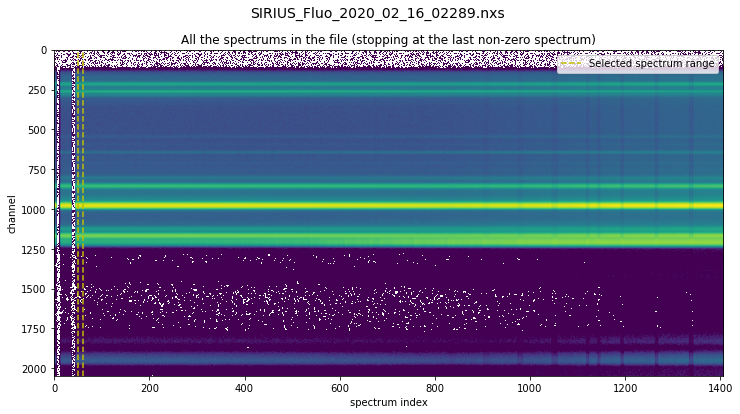

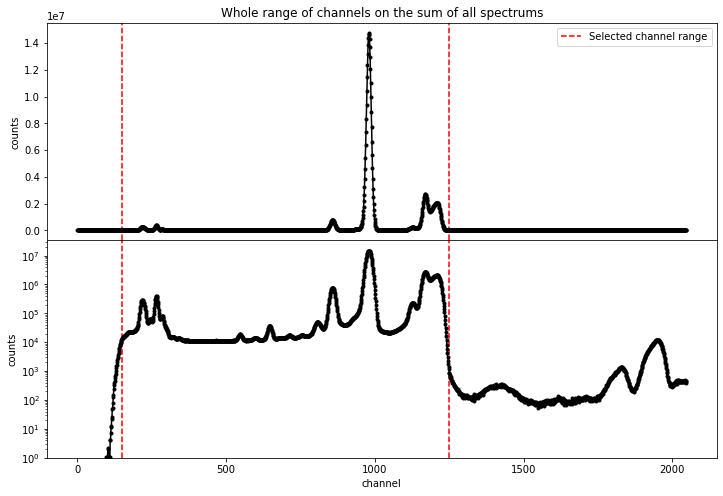

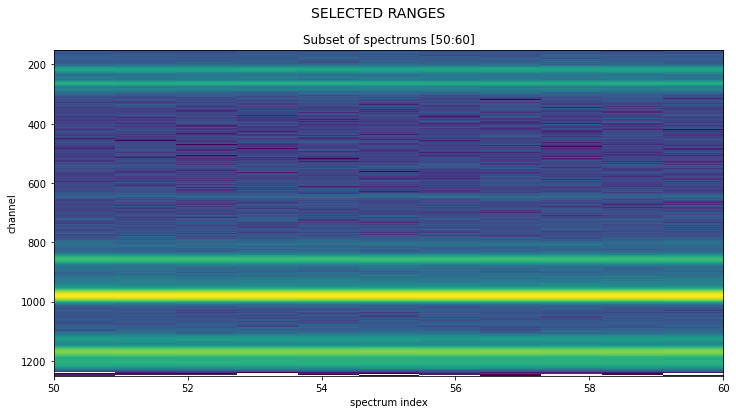

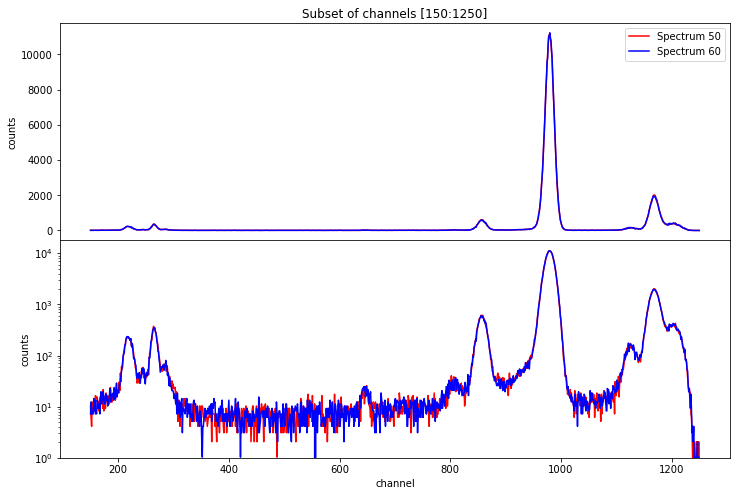

In [3]:
scan = FF.Define_scan(expt)

## Peak definition

In [4]:
# Run this cell
FF.Define_peaks(expt)

Sheet(cells=(Cell(column_end=0, column_start=0, row_end=19, row_start=0, squeeze_row=False, type='text', value…

In [5]:
# Run this cell
FF.Extract_elems(expt)
w = widgets.interact(FF.Display_peaks, expt=widgets.fixed(expt), spectrum_index=widgets.IntText(value=0, step=1, description='Spectrum:'))

interactive(children=(IntText(value=0, description='Spectrum:'), Output()), _dom_classes=('widget-interact',))

## Fit the spectrums

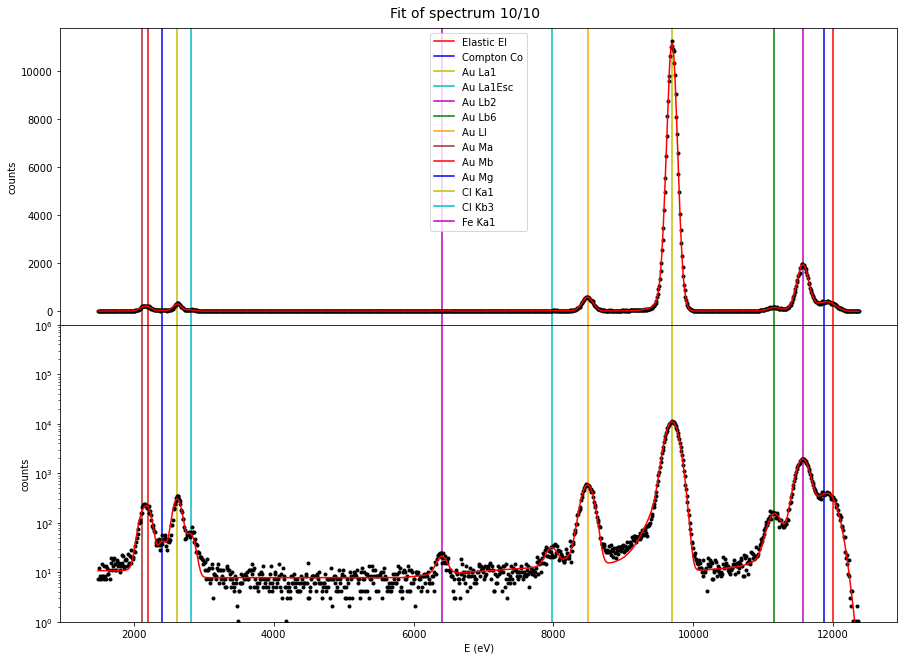

####################################################
Fits are done. Results shown below.
####################################################



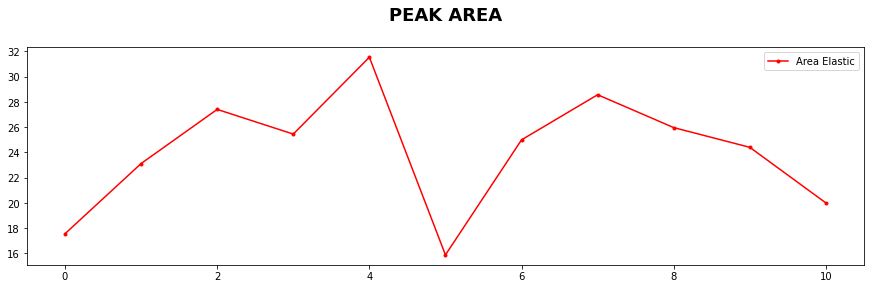

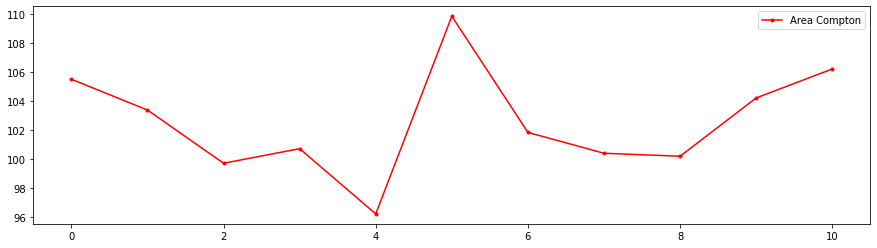

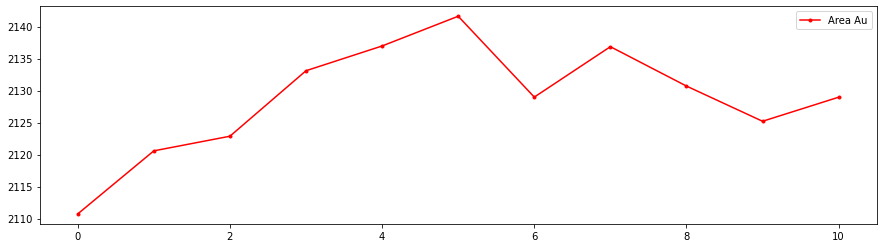

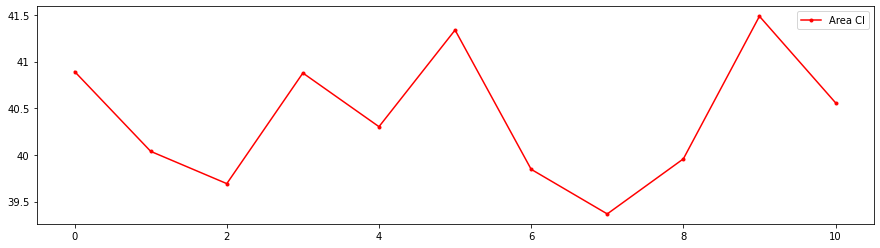

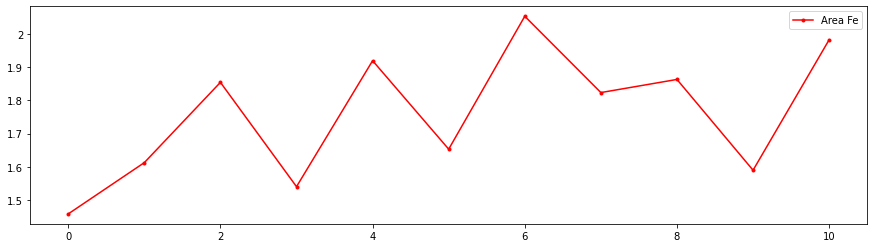

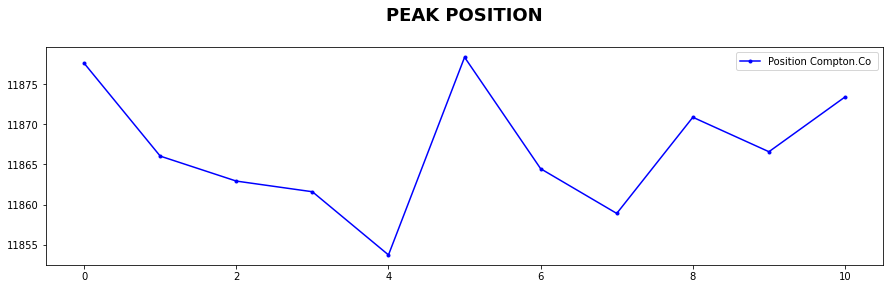

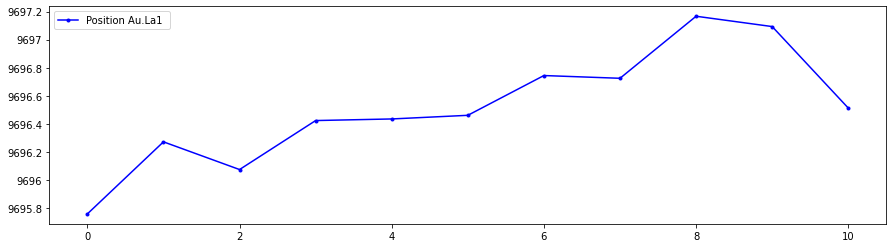

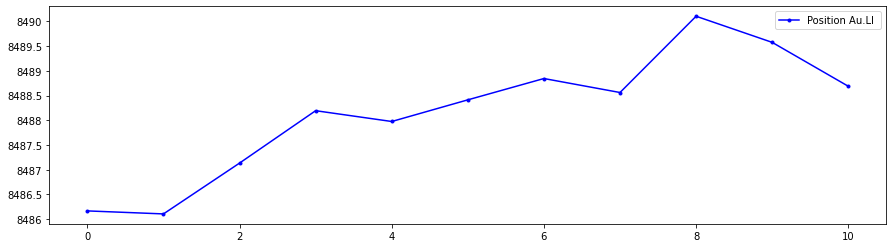

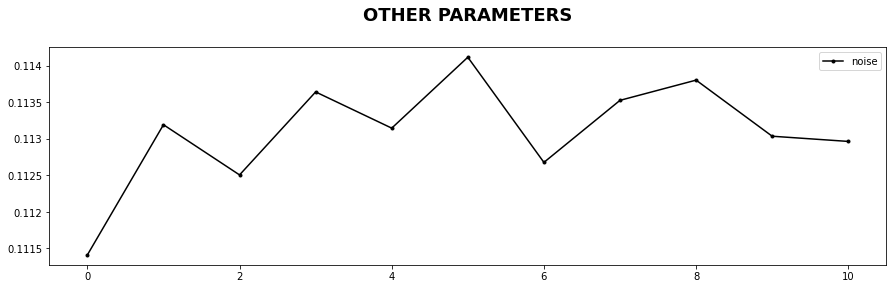

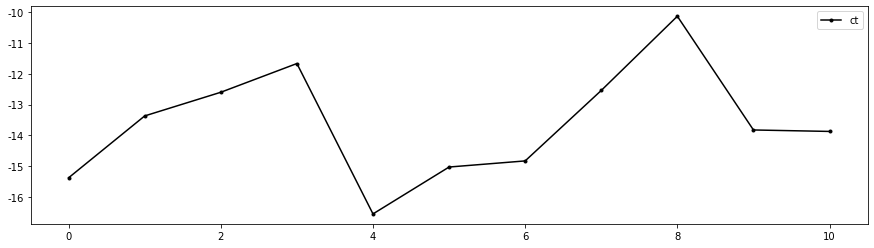

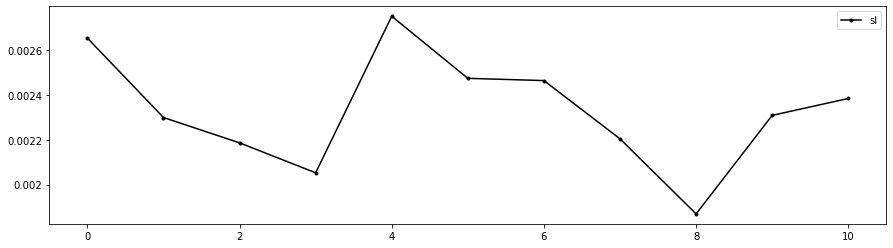

#####################################################
Results are saved in:
/Users/arnaudhemmerle/Documents/Recherche/Analysis/JupyFluo/working/SIRIUS_Fluo_2020_02_16_02289/FitResults.csv


In [6]:
# Run this cell
AF.Fit_spectrums(expt)

In [26]:
t = np.array([1,2,3,10])
a = np.array([4,5,6,11])
b = np.array([7,8,9,12])

print(np.reshape(np.vstack([t,a,b]),(4,3)))

import csv


with open(expt.working_dir+expt.id+'/Test.csv', 'w', newline='') as f:
    writer = csv.writer(f,delimiter=';')
    tbw = np.vstack([t, a, b])
    writer.writerows(tbw) 

[[ 1  2  3]
 [10  4  5]
 [ 6 11  7]
 [ 8  9 12]]


In [10]:
t = np.array([13949.3483834934,2,3,10])
np.round(t,2)

array([1.394935e+04, 2.000000e+00, 3.000000e+00, 1.000000e+01])

## Show the results on a given spectrum

In [7]:
# Run this cell
FF.Choose_spectrum_to_plot()

Button(description='Click to plot', layout=Layout(height='40px', width='300px'), style=ButtonStyle())

<IPython.core.display.Javascript object>

Fit results for SIRIUS_Fluo_2020_02_16_02289.nxs
Spectrum interval = [50,65]
Channel interval = [150,1250]
List of chosen elements:  ['Element 4']

Parameters used:
gain = 9.89; eV0 = 6
List of fitted parameters: ['sl', 'ct', 'noise']

Initial fit parameters:
epsilon = 0.0036; fan = 0.115; noise = 0.113
sl = 0; ct = 0
sfa0 = -0.0002114; sfa1 = 0.0001089; tfb0 = 0.080845; tfb1 = 1e-10
twc0 = 0.5164; twc1 = 0.1003
fG = 1.479
fA = 1e-10; fB = 1e-10; gammaA = 1e+10; gammaB = 1e+10



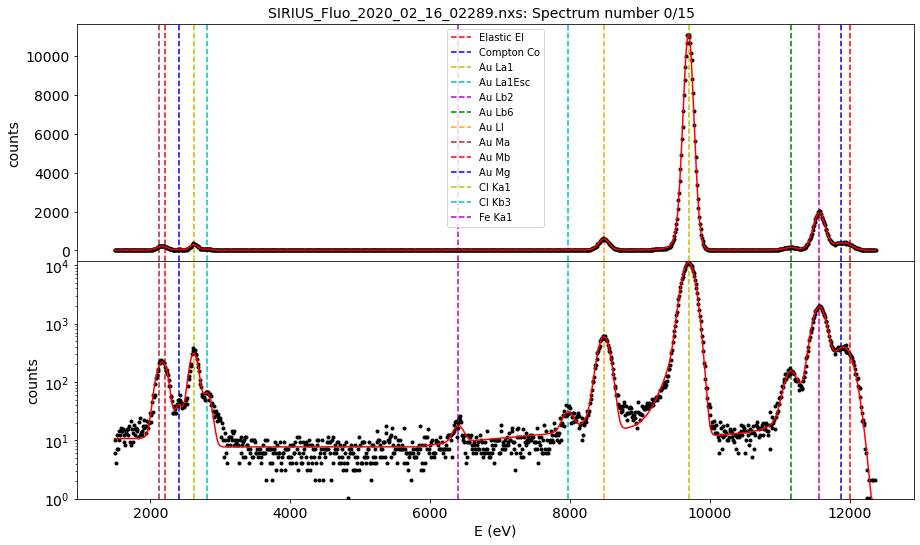

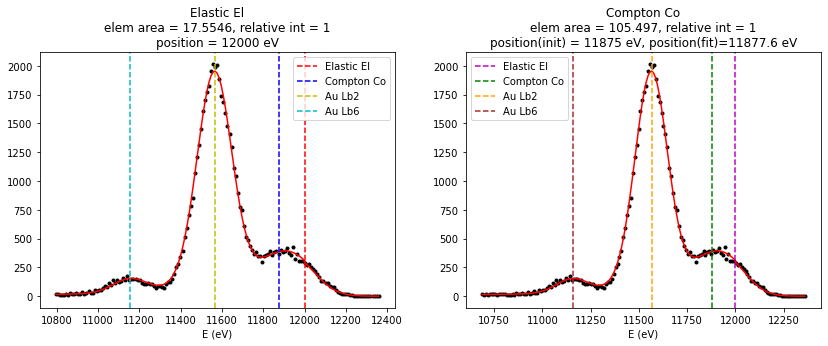

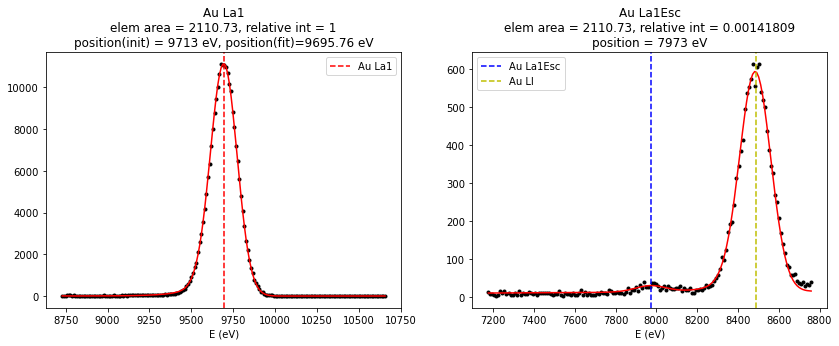

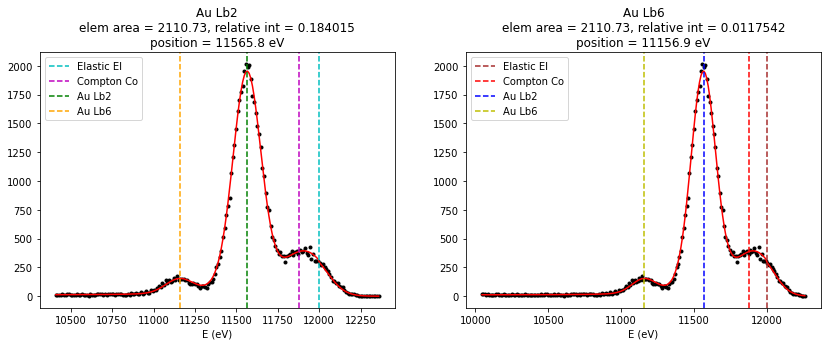

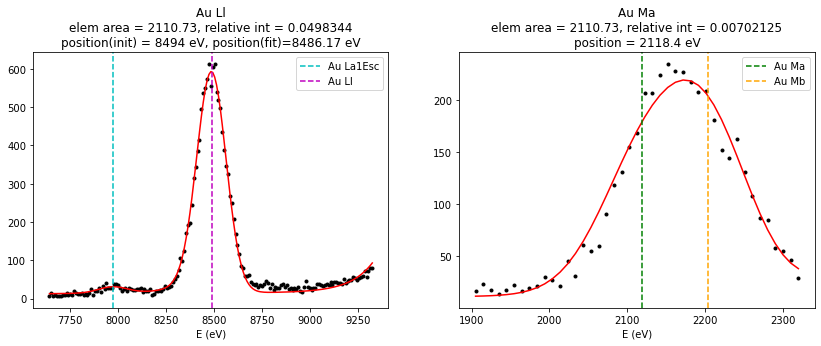

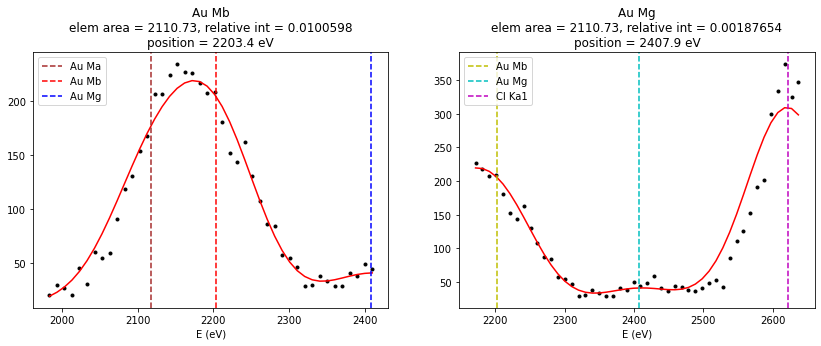

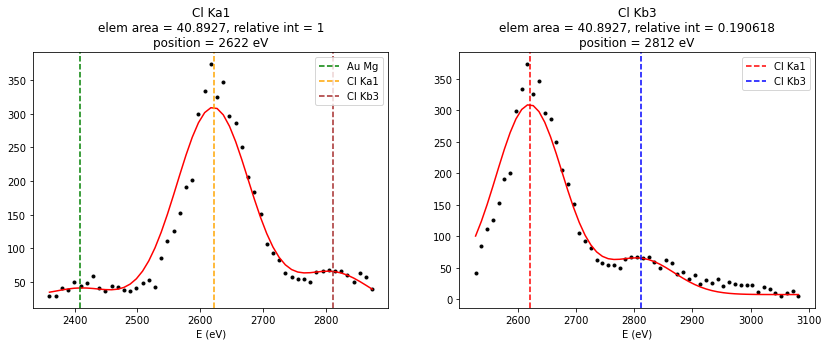

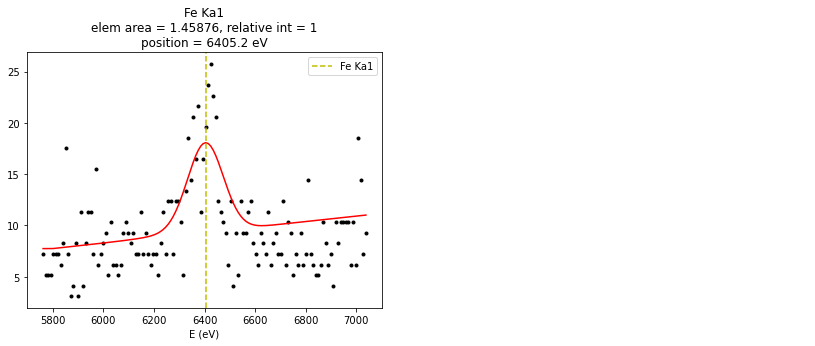

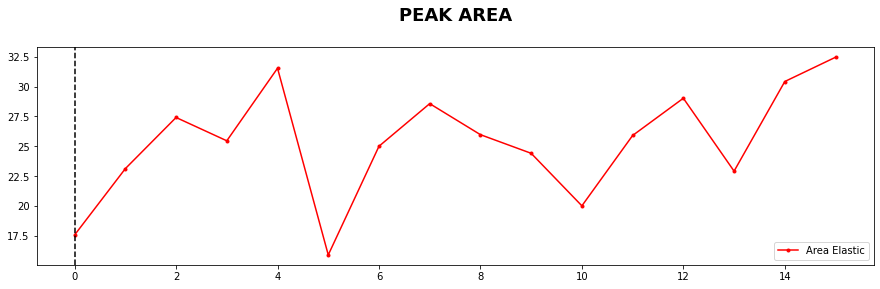

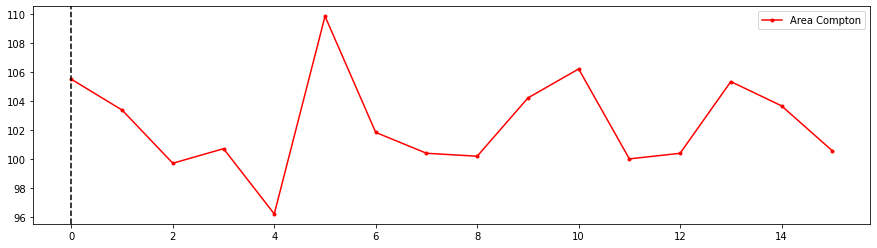

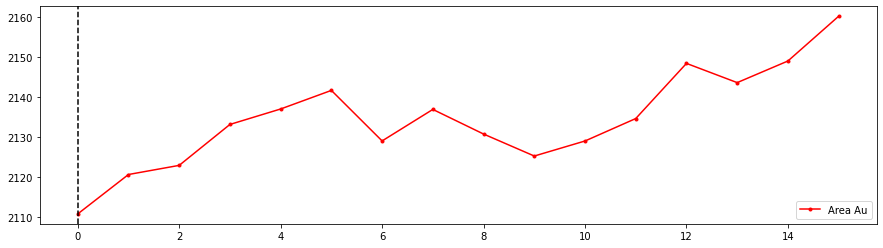

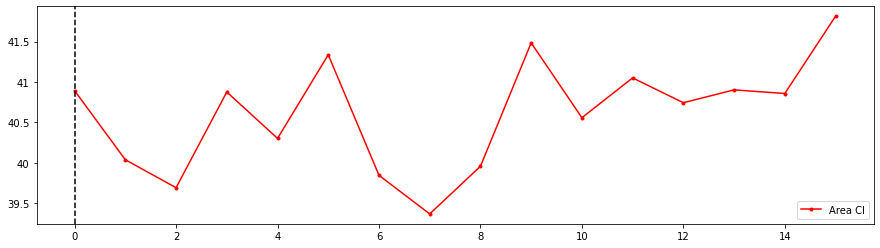

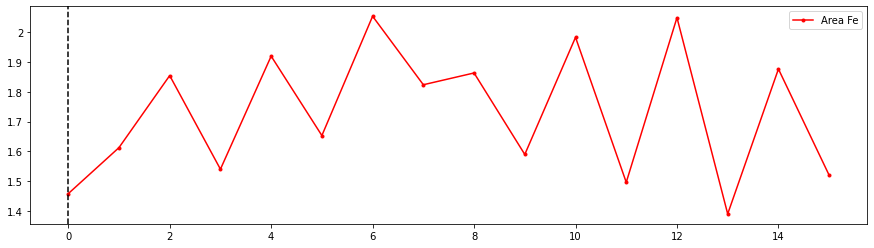

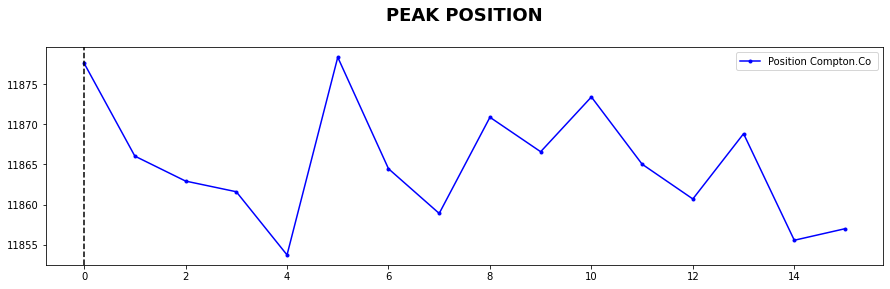

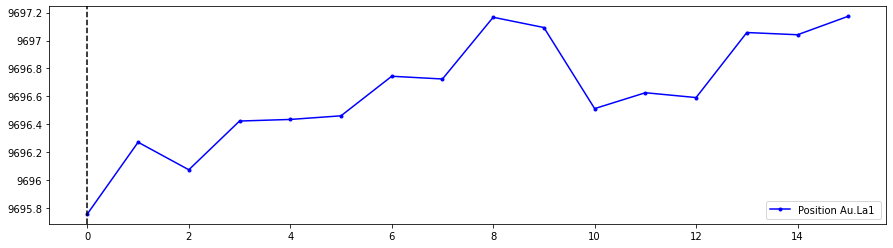

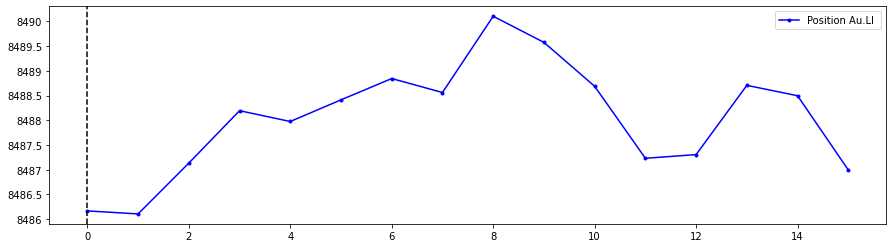

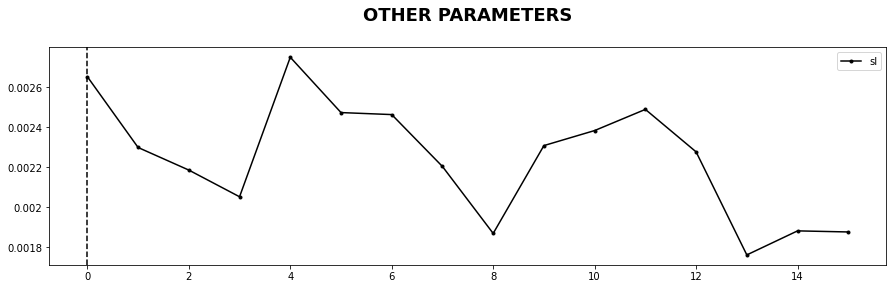

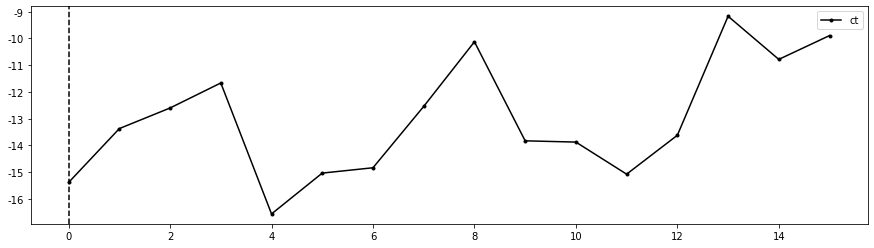

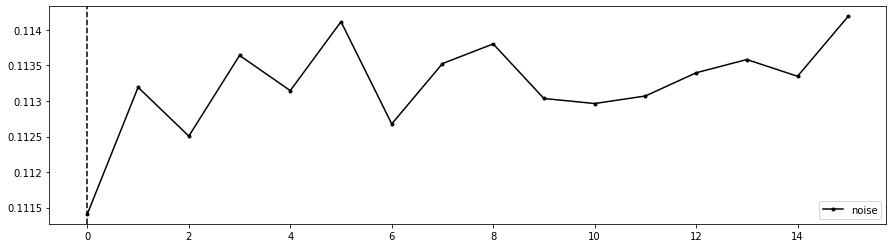

In [8]:
FF.Load_results(expt, spectrum_index=0, is_save=False)

In [7]:
FF.Generate_cells_on_click(expt)